## Descripción del dataset

### Link https://www.inegi.org.mx/datosprimarios/iavl/default.html#Tabulados

### Registro administrativo de la industria automotriz de vehículos ligeros

El Registro Administrativo de la Industria Automotriz de Vehículos Ligeros ofrece datos mensuales por empresa referentes a la venta, producción y exportación de las **unidades vehiculares nuevas**, sin especificar valores monetarios.

Para la difusión de este registro administrativo, se dispone de la autorización de las 21 empresas afiliadas a la Asociación Mexicana de la Industria Automotriz, A.C. (AMIA), Mitsubishi Motors S.A. de C.V. y Giant Motors Latinoamérica S.A. de C.V. para publicar información sobre el número de vehículos de cada una de las 34 marcas y modelos correspondientes que producen y/o comercializan en México.

Esta **información proporcionada directamente por las empresas**, no se somete a **ningún tratamiento** de tipo estadístico y mantiene el carácter de registro administrativo, por lo tanto, cuando alguna empresa **no suministra la información requerida**, se utiliza **N.D. (No Disponible)**, indicando que la cifra no fue entregada al INEGI para su publicación.

En este caso se tomo el historico de Enero del 2005 a Febrero del 2020 de las ventas al público de vehículos ligeros por marca, modelo, segmento y país origen

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv("data/ventas_autos.csv")

In [12]:
df.head()

,Tema,Año,Mes,Marca,Modelo,Tipo,Segmento,Origen,País origen,Cantidad
0,Venta al publico de vehículos,2005,Enero,Acura,Mdx,Camiones ligeros,SUV's,Importado,Canadá,18
1,Venta al publico de vehículos,2005,Enero,Acura,Rl,Automóviles,De Lujo,Importado,Japón,4
2,Venta al publico de vehículos,2005,Enero,Acura,Tl 3.5l,Automóviles,De Lujo,Importado,Estados Unidos,38
3,Venta al publico de vehículos,2005,Enero,Audi,A3,Automóviles,De Lujo,Importado,Brasil,74
4,Venta al publico de vehículos,2005,Enero,Audi,A4 1.8 Cabrio,Automóviles,De Lujo,Importado,Alemania,9


In [13]:
df.columns

Index(['Tema', 'Año', 'Mes', 'Marca', 'Modelo', 'Tipo', 'Segmento', 'Origen',
       'País origen', 'Cantidad'],
      dtype='object')

In [14]:
df.describe()

,Año
count,67167.000000
mean,2012.192103
std,4.432692
min,2005.000000
25%,2008.000000
50%,2012.000000
75%,2016.000000
max,2020.000000


In [21]:
uniques = {}
for col in df.columns:
    uniques[col] = df[col].unique()
    print(f"{col} {len(uniques[col])} \n {uniques[col]}")

Tema 1 
 ['Venta al publico de vehículos']
Año 16 
 [2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]
Mes 12 
 ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
Marca 35 
 ['Acura' 'Audi' 'BMW' 'Chrysler' 'Ford Motor' 'General Motors' 'Honda'
 'Jaguar' 'Land Rover' 'Lincoln' 'Mercedes Benz' 'MG ROVER' 'Mini'
 'Mitsubishi' 'Nissan' 'Peugeot' 'Porsche' 'Renault' 'SEAT' 'Smart'
 'Toyota' 'Volkswagen' 'Volvo' 'Mazda' 'Suzuki' 'Bentley' 'Fiat' 'Subaru'
 'Isuzu' 'Alfa Romeo' 'Infiniti' 'Hyundai' 'KIA' 'JAC' 'BAIC']
Modelo 1043 
 ['Mdx' 'Rl' 'Tl 3.5l' ... 'E Sei 1' 'E Sei 2' 'E Sei 4']
Tipo 2 
 ['Camiones ligeros' 'Automóviles']
Segmento 7 
 ["SUV's" 'De Lujo' 'Subcompactos' 'Compactos' 'Deportivos' 'Pick Ups'
 'Minivans']
Origen 2 
 ['Importado' 'Nacional']
País origen 32 
 ['Canadá' 'Japón' 'Estados Unidos' 'Brasil' 'Alemania' 'Hungría' 'Austria'
 'Corea del Sur' 'México' 'España' 'Bélgica' 'A

In [34]:
quantity = df["Cantidad"].apply(lambda x: x.replace(" ","").replace("-",""))
quantity = quantity.apply(lambda x: int(x) if len(x) > 0 else 0)
df["Cantidad"] = quantity

In [53]:
months={}
for i,month in enumerate(uniques["Mes"]):
    months[month] = i+1
months

{'Enero': 1,
 'Febrero': 2,
 'Marzo': 3,
 'Abril': 4,
 'Mayo': 5,
 'Junio': 6,
 'Julio': 7,
 'Agosto': 8,
 'Septiembre': 9,
 'Octubre': 10,
 'Noviembre': 11,
 'Diciembre': 12}

In [55]:
df["Mes"] = df["Mes"].apply(lambda x: months[x])

In [69]:
df["MMYYYY"] = df.apply(lambda x: f'{x["Mes"]}-{x["Año"]}',axis=1)

In [83]:
df["MMYYYY"] = pd.to_datetime(df["MMYYYY"])

In [116]:
brandGrouped = df.groupby(["Marca","MMYYYY"])["Cantidad"].mean().reset_index()

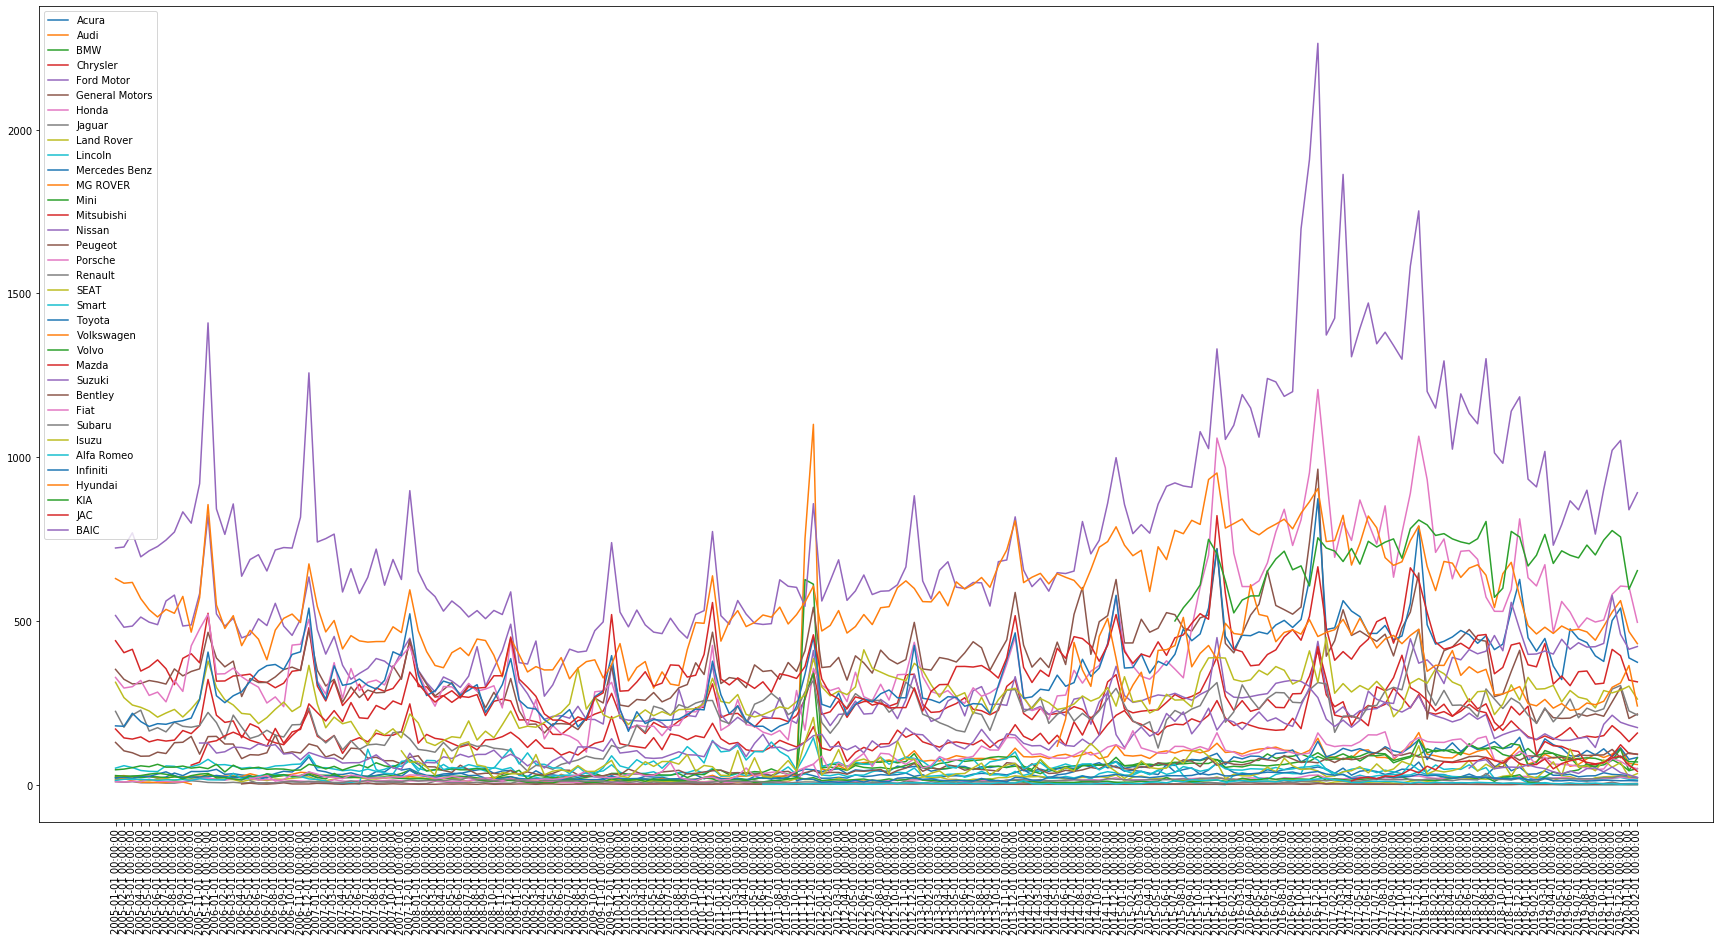

In [91]:
plt.figure(figsize=(30,15))
for brand in uniques["Marca"]:
    filtered = brandGrouped[brandGrouped["Marca"] == brand].sort_values(by="MMYYYY")
    y = filtered["Cantidad"]
    x = list(map(lambda x: str(x),filtered["MMYYYY"]))
    plt.plot(x,y,label=brand)
    plt.legend()
    plt.xticks(rotation=90)
plt.savefig("cars.png")

In [93]:
brandMonthlyGrouped = df.groupby(["Marca","Mes"])["Cantidad"].mean().reset_index()

In [112]:
brandYearlyGrouped = df.groupby(["Marca","Año"])["Cantidad"].mean().reset_index()
top10brands = {}
for year in uniques["Año"]:
    top10brands[year] = brandYearlyGrouped[brandYearlyGrouped["Año"] == year].sort_values(by="Cantidad",ascending=False)[:10].reset_index()

In [114]:
topbrands = set()
for year in uniques["Año"]:
    topbrands = topbrands.union(set(top10brands[year]["Marca"]))
topbrands

{'Chrysler',
 'Ford Motor',
 'General Motors',
 'Honda',
 'Hyundai',
 'KIA',
 'Mazda',
 'Mitsubishi',
 'Nissan',
 'Renault',
 'SEAT',
 'Suzuki',
 'Toyota',
 'Volkswagen'}

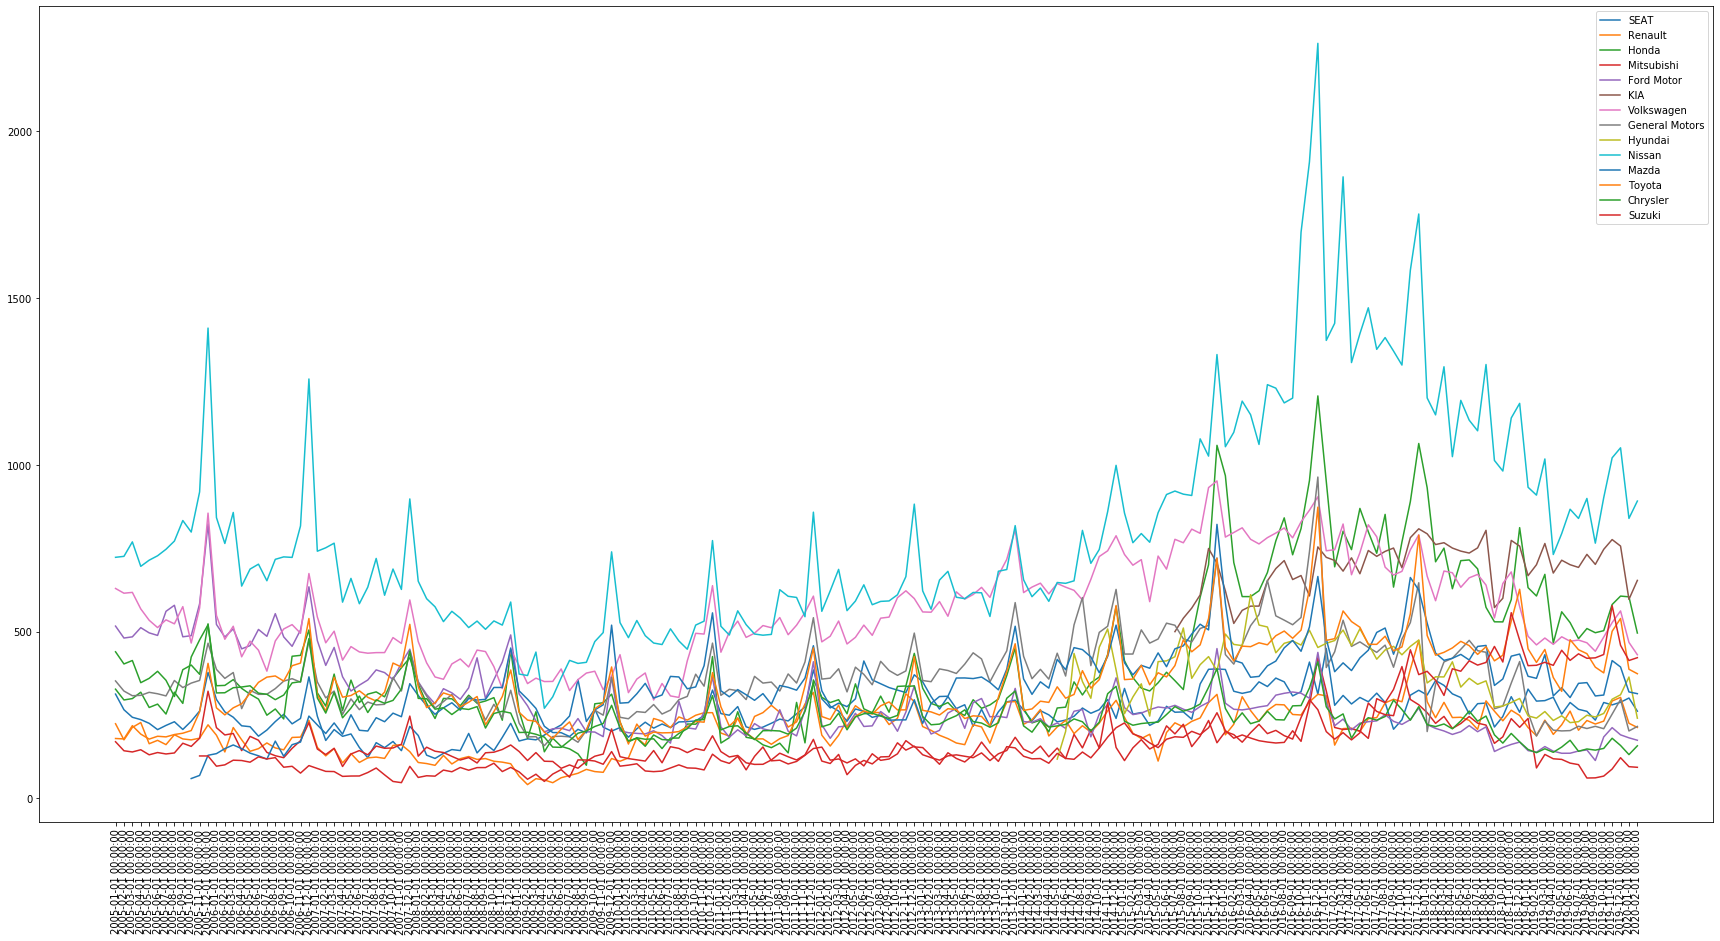

In [120]:
plt.figure(figsize=(30,15))
for brand in topbrands:
    filtered = brandGrouped[brandGrouped["Marca"] == brand].sort_values(by="MMYYYY")
    y = filtered["Cantidad"]
    x = list(map(lambda x: str(x),filtered["MMYYYY"]))
    plt.plot(x,y,label=brand)
    plt.legend()
    plt.xticks(rotation=90)
plt.savefig("cars2.png")

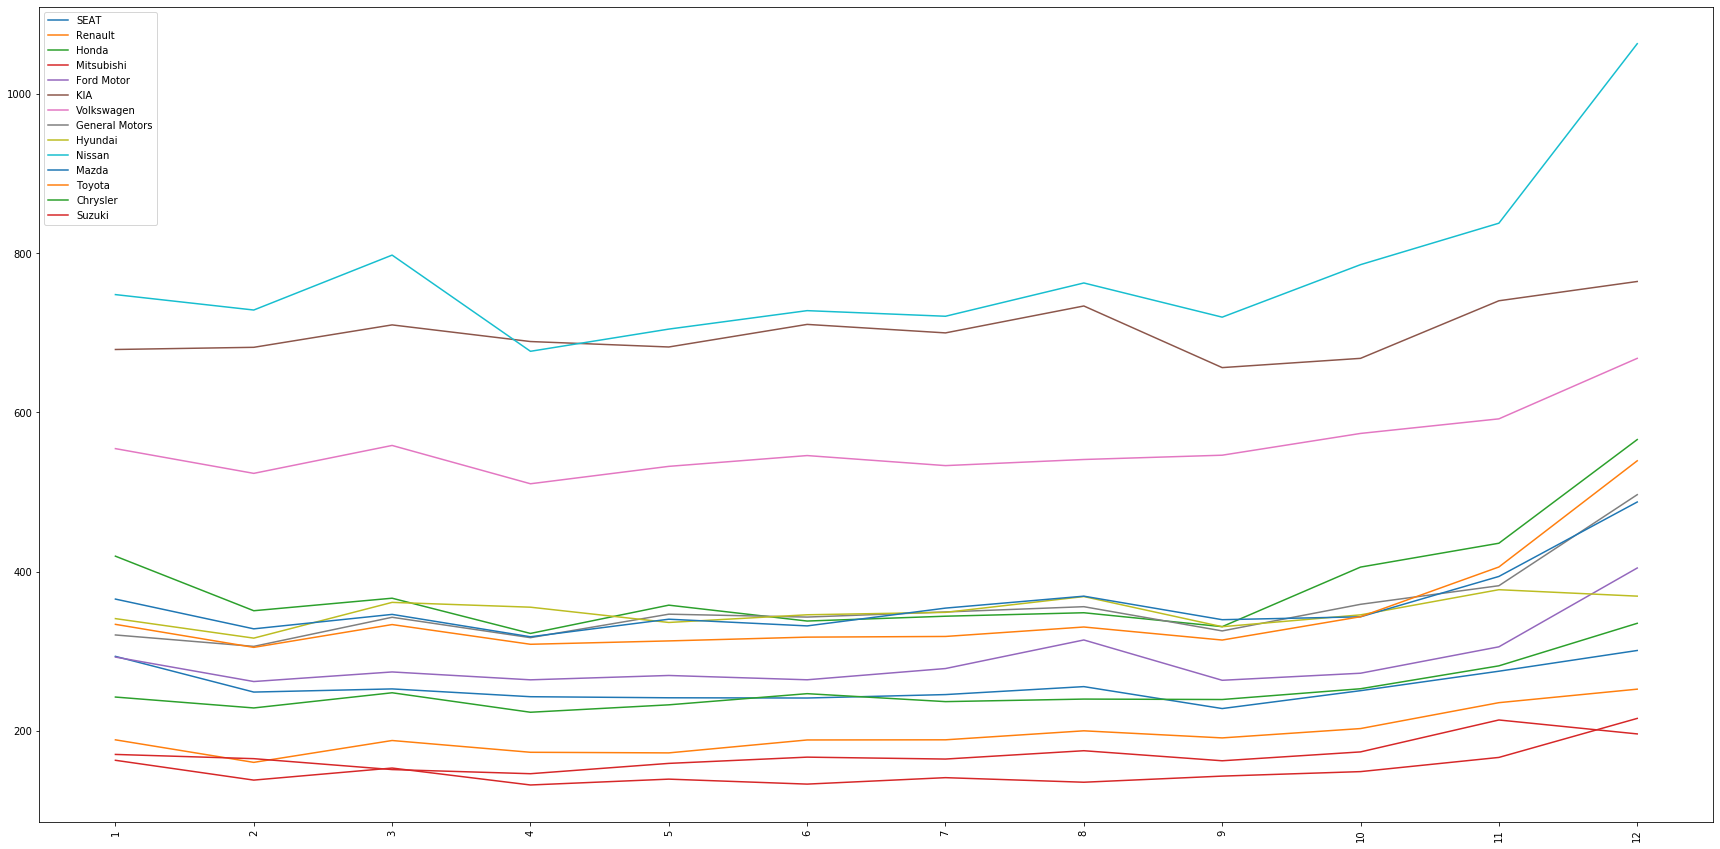

In [119]:
plt.figure(figsize=(30,15))
for brand in topbrands:
    filtered = brandMonthlyGrouped[brandMonthlyGrouped["Marca"] == brand].sort_values(by="Mes")
    y = filtered["Cantidad"]
    x = list(map(lambda x: str(x),filtered["Mes"]))
    plt.plot(x,y,label=brand)
    plt.legend()
    plt.xticks(rotation=90)
plt.savefig("cars3.png")

In [302]:
carYearlyGrouped = df.groupby(["Modelo","Año"])["Cantidad"].mean().reset_index()
top100models = {}
for year in uniques["Año"]:
    top100models[year] = carYearlyGrouped[carYearlyGrouped["Año"] == year].sort_values(by="Cantidad",ascending=False)[:100].reset_index()
    

In [128]:
topmodels = set()
for year in uniques["Año"]:
    topmodels = topmodels.union(set(top100models[year]["Modelo"]))
topmodels

{'Accord 4pts',
 'Aveo',
 'Aveo-',
 'Beat',
 'Beat 4 PTAS.',
 'Bora',
 'CR-V',
 'CR-V-',
 'Chasis Largo',
 'Chevy 3 Ptas',
 'Chevy 4 PTAS',
 'Corsa Sedan 4 Ptas',
 'Ecosport',
 'Fiesta Sedan / Ikon Notch',
 'Jetta',
 'Jetta 4 PTAS',
 'Journey',
 'KIA Río Sedan-',
 'March',
 'NP300',
 'Nuevo Jetta',
 'Optra',
 'Platina 4 PTS',
 'Pointer 4 Ptas',
 'Sentra',
 'Sentra 4 PTS',
 'Sonic-',
 'Spark',
 'Tiida Sedan',
 'Tsuru 4 PTS',
 'Vento',
 'Versa'}

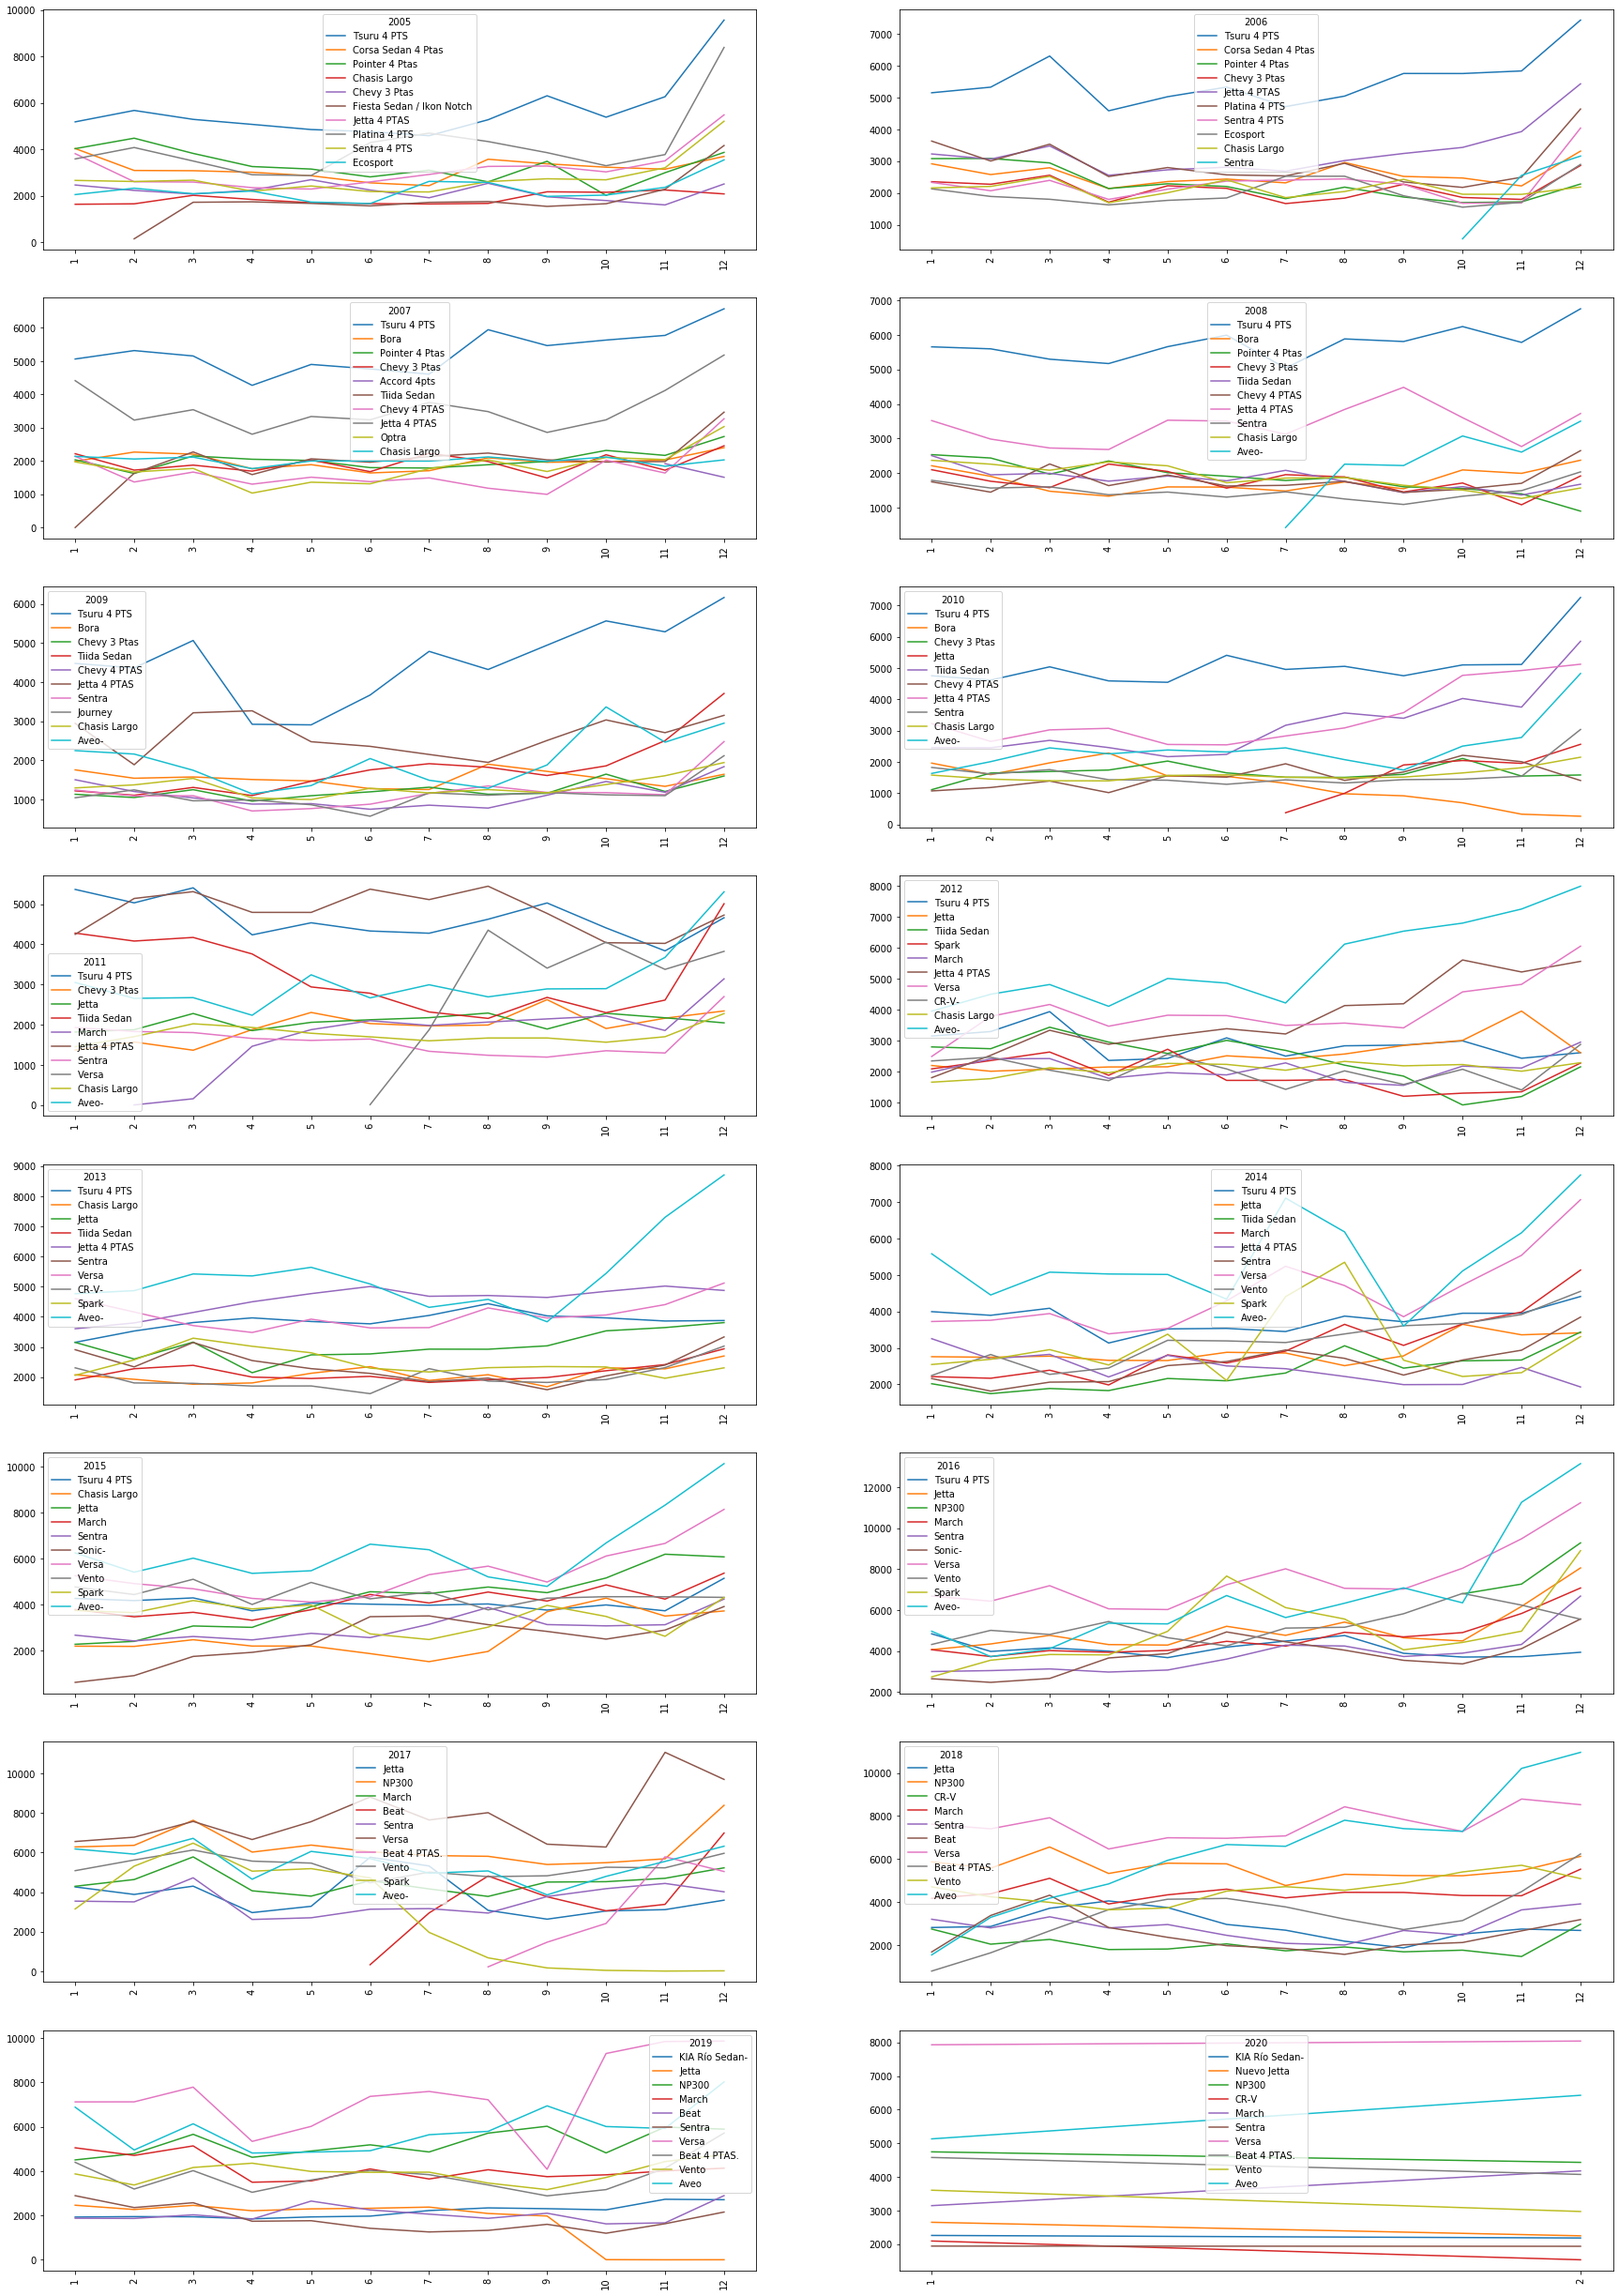

In [291]:
plt.figure(figsize=(30,50))
for i,year in enumerate(uniques["Año"]):
    plt.subplot(len(uniques["Año"])//2+1,2,i+1)
    topmodels = set(top100models[year]["Modelo"])
    filtered = df[df["Año"] == year]
    filtered = filtered[filtered["Modelo"].isin(topmodels)]
    filtered = filtered.groupby(["Modelo","Mes"])["Cantidad"].sum().reset_index()
    for brand in topmodels:
        filtered2 = filtered[filtered["Modelo"] == brand].sort_values(by="Mes")
        y = filtered2["Cantidad"]
        x = list(map(lambda x: str(x),filtered2["Mes"]))
        plt.plot(x,y,label=brand)
        plt.grid()
        plt.legend(title=year)
        plt.xticks(rotation=90)
plt.savefig("cars4.png")




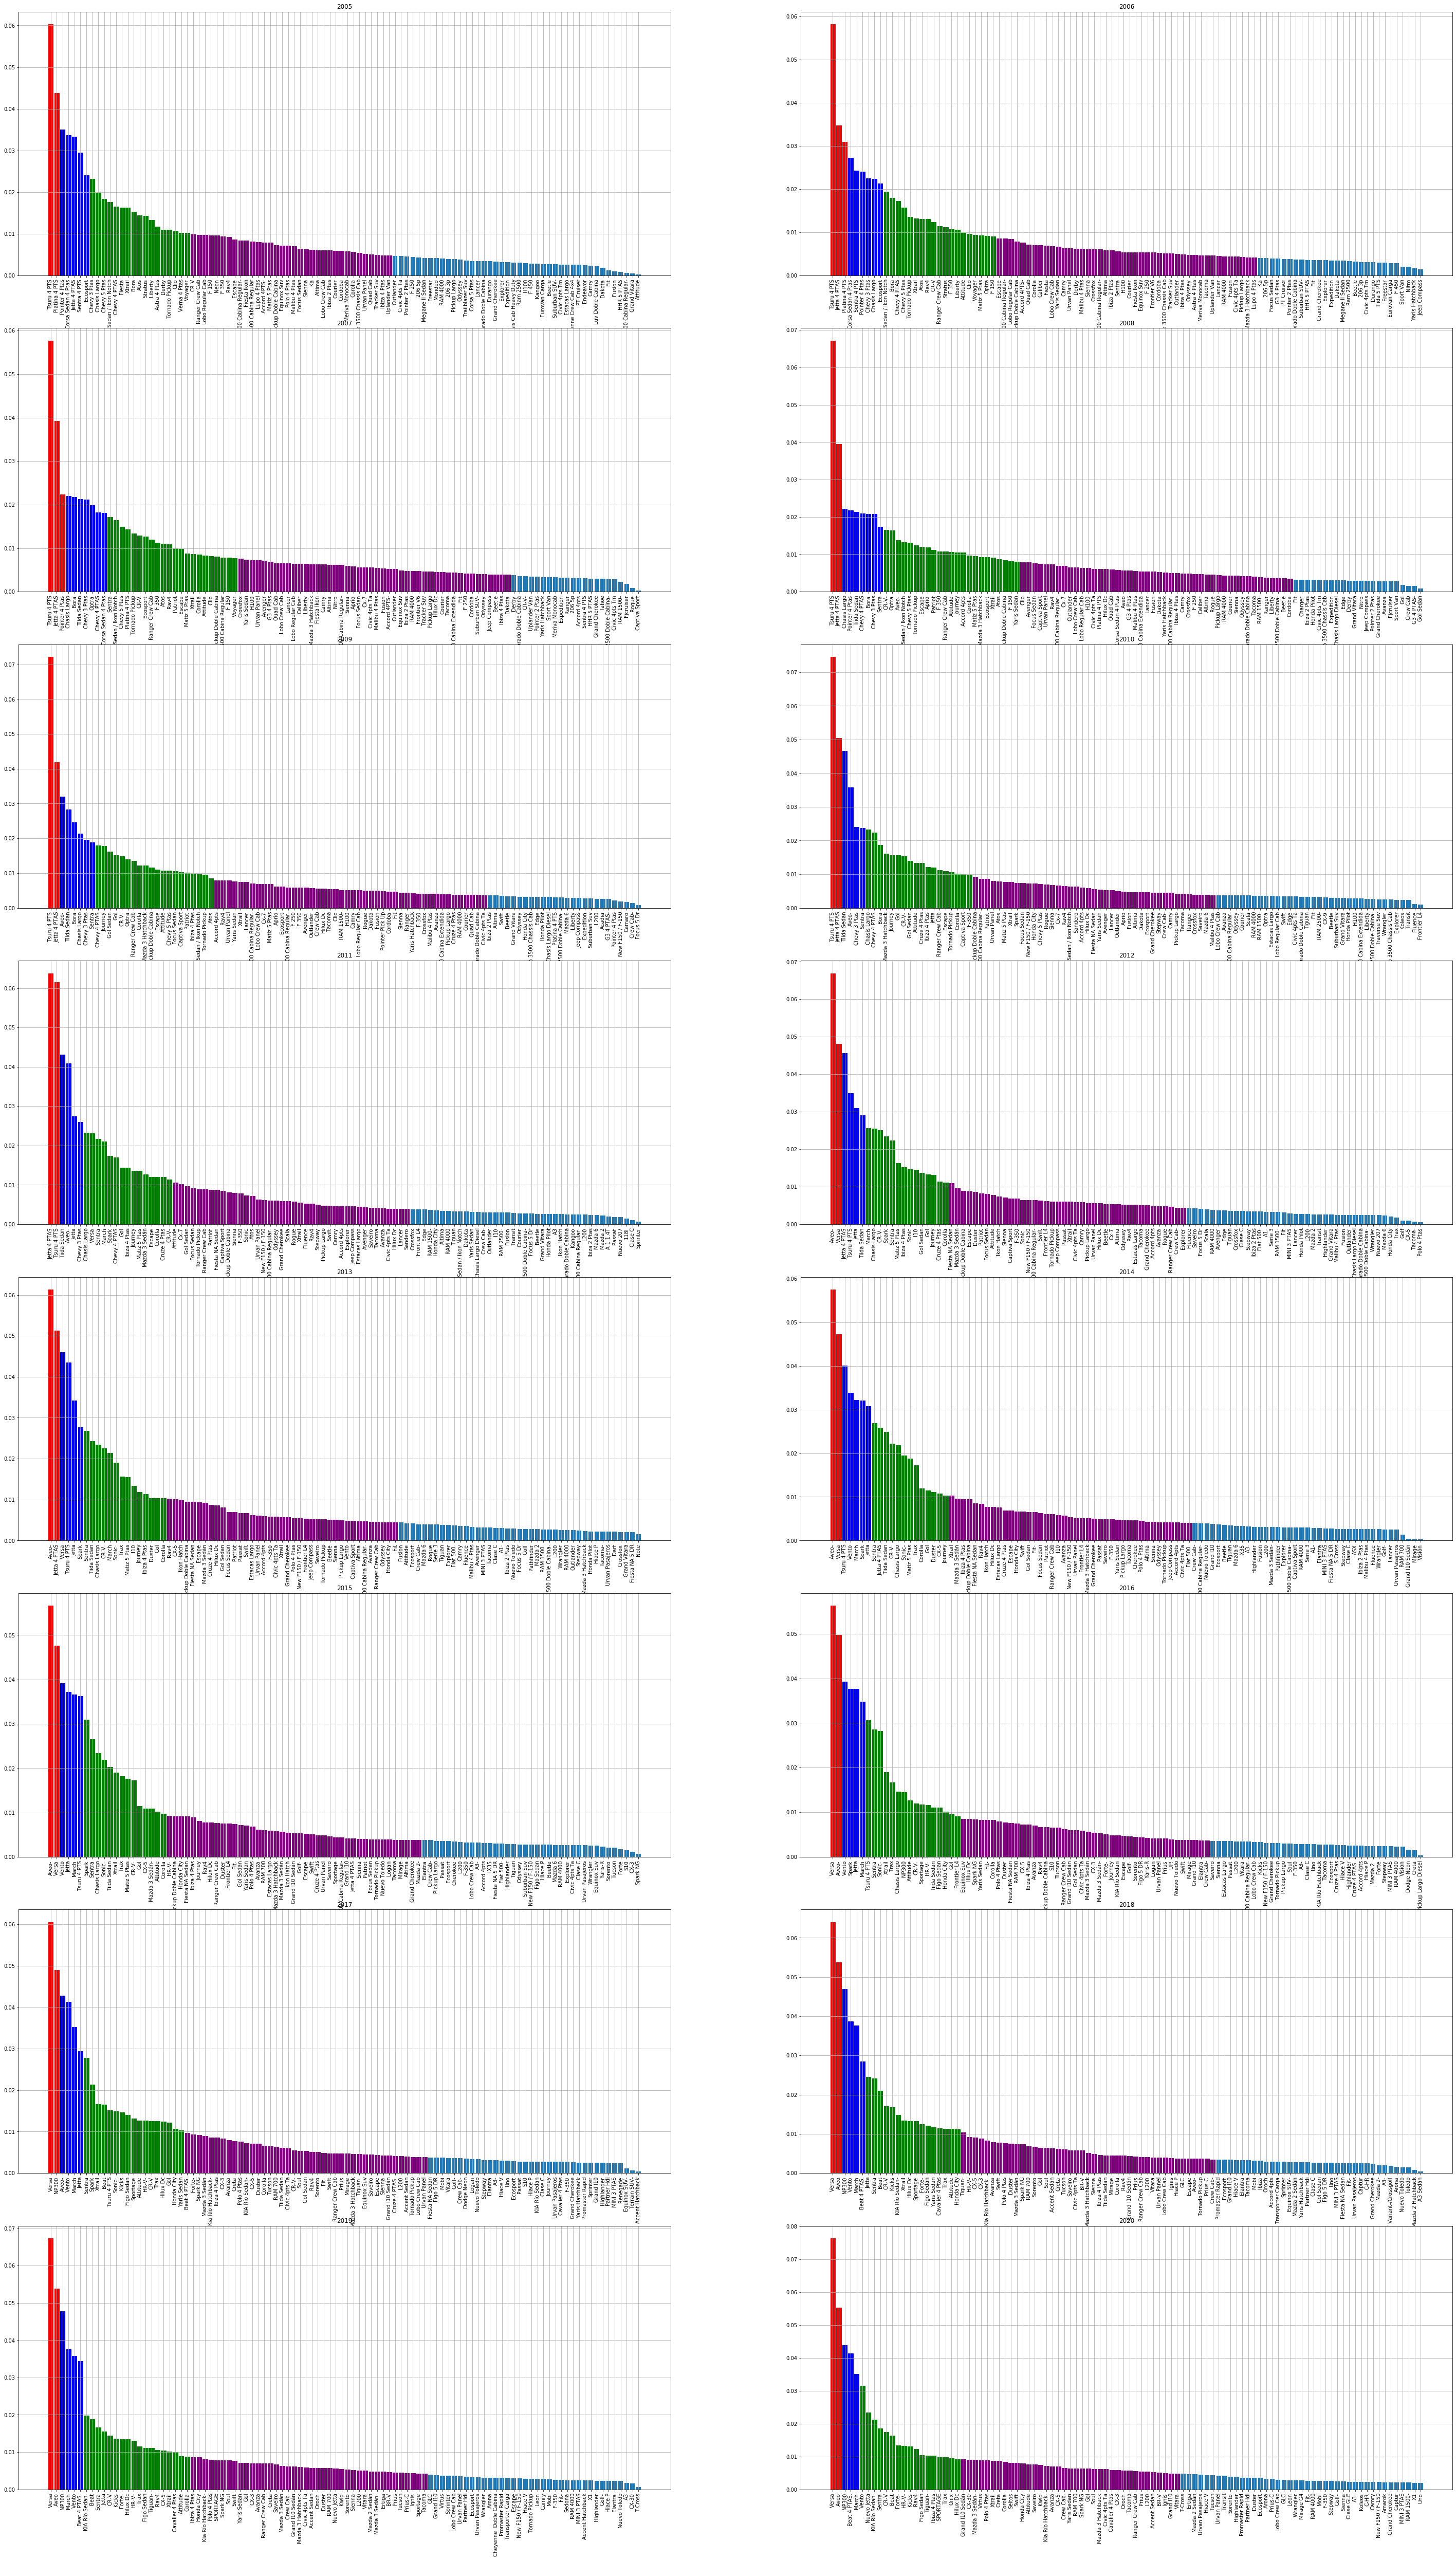

In [309]:
yeartotals = df.groupby(["Año"])["Cantidad"].sum().reset_index()
percetangeOfSells = {}
plt.figure(figsize=(50,100))
colors = [[0.1,"red"],[0.25,"blue"],[0.5,"green"],[0.75,"purple"]]
for i,year in enumerate(uniques["Año"]):
    plt.subplot(len(uniques["Año"])//2+1,2,i+1)
    topmodels = set(top100models[year]["Modelo"])
    yearTotal = yeartotals[yeartotals["Año"] == year]["Cantidad"]
    filtered = df[df["Año"] == year]
    filtered = filtered[filtered["Modelo"].isin(topmodels)]
    filtered = filtered.groupby(["Modelo","Año"])["Cantidad"].sum().reset_index()
    filtered = filtered.sort_values(by="Cantidad",ascending=False)
    y = filtered["Cantidad"].apply(lambda x: x/yearTotal).values.reshape(-1)
    x = filtered["Modelo"]
    percetangeOfSells[year] = filtered
    plt.title(year)
    bars = plt.bar(x,y)#,label=x)
    total = 0
    for i,val in enumerate(y):
        for color in colors:
            if total < color[0]:
                bars[i].set_color(color[1])
                break
        total += val
    plt.grid()
    #plt.legend(title=year)
    plt.xticks(rotation=90)
plt.savefig("cars4.png")

In [245]:
modelYearGrouped2 =  df.groupby(["Mes"]).mean().reset_index().sort_values(by="Mes")["Cantidad"]
count =  df.groupby(["Mes"]).count().reset_index().sort_values(by="Mes")["Cantidad"]

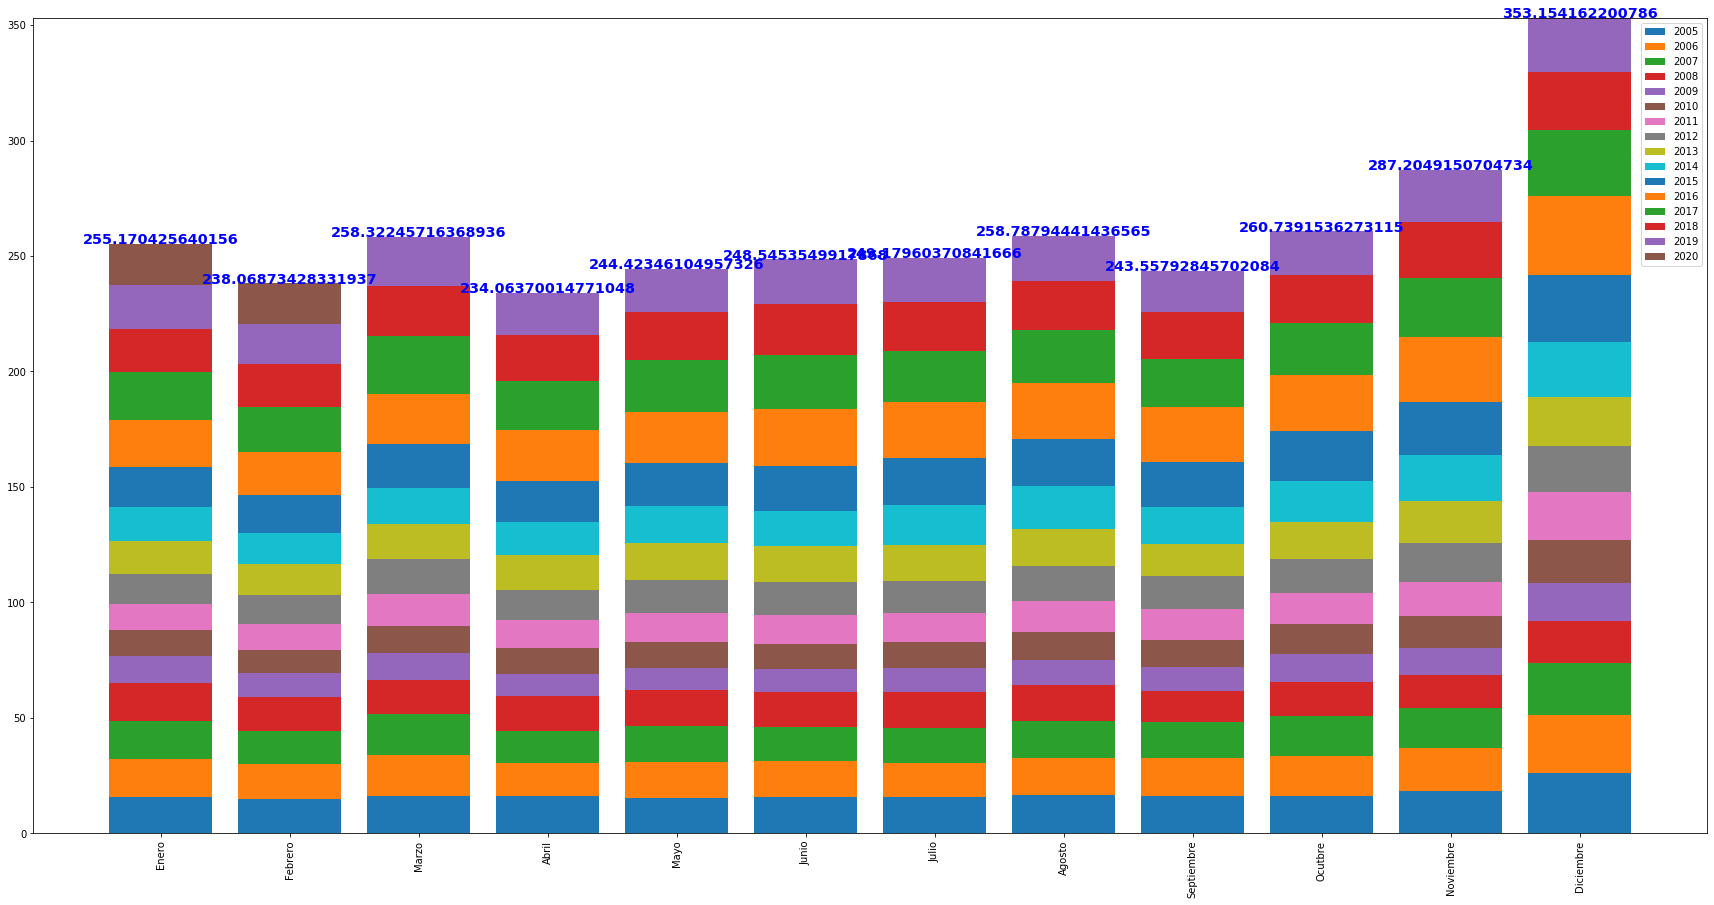

In [270]:
plt.figure(figsize=(30,15))
bottom = None
months = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Ocutbre","Noviembre","Diciembre"]
for i,year in enumerate(uniques["Año"]):
    filtered = df[df["Año"] == year]
    filtered = filtered.groupby(["Mes"])["Cantidad"].sum().reset_index().sort_values(by="Mes")
    y = np.divide(filtered["Cantidad"].values,count.values[:len(filtered)])
    y = np.array(list([(y[i] if i < len(y) else 0) for i in range(12)]))
    x = months
    if bottom is None:
        plt.bar(x,y,label=year)
        bottom = np.array(list([ j for j in y]))
    else:
        try:
            plt.bar(x,y,bottom=bottom,label=year)
        except Exception as e:
            print(e,x,y,bottom, np.shape(x),np.shape(y),np.shape(bottom))
        bottom += np.array(list([ j for j in y]))
    

for i, v in enumerate(modelYearGrouped2):
    plt.text(i, v, f"{v}", color='blue',ha="center", fontsize="x-large",fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("cars5.png")



In [234]:
filtered,count

(   Mes  Cantidad
 0    1    104832
 1    2    104328, 0     5897
 1     5965
 2     5486
 3     5416
 4     5507
 5     5479
 6     5501
 7     5541
 8     5619
 9     5624
 10    5534
 11    5598
 Name: Cantidad, dtype: int64)